<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/Pigmentation_EXP2_cleaned_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [0]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


Import Packages with required versions

In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline


(689, 898, 3)


In [0]:
import skimage


In [0]:
import numpy as np


In [0]:
import scipy
scipy.__version__

'1.0.0'

In [0]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

Get Pigmentation Photos

In [0]:
from scipy import ndimage, misc
import re
import os
from datetime import datetime

pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            key = n.group(3)

            key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)
            



1900-02-23 17:07:15 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190223_170715_FA101129_0100_SPOTS_XX_SPOTS#01_S_UnitedStates_CND_XX.jpg 

1900-02-25 10:09:33 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg 

1900-02-26 09:43:00 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190226_094300_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg 

1900-02-26 22:45:23 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR24.jpg 

1900-02-27 07:37:48 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190227_073748_FA101129_0100_SPOTS_58_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR58.jpg 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


1900-02-27 21:20:58 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg 

1900-02-28 08:38:04 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg 

1900-02-28 21:47:05 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190228_214705_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg 

1900-03-01 08:36:13 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190301_083613_FA101129_0100_SPOTS_81_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR81.jpg 

1900-03-03 22:48:59 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190303_224859_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg 

1900-03-04 20:58:23 ./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1/1_F_43_XX_25_20190304_205823_FA101129_0100_SPOTS_5

Retrieve unordered filenames for Melanoma training set from directory using os

In [0]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

Order the photos using dictionary sorting

In [0]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


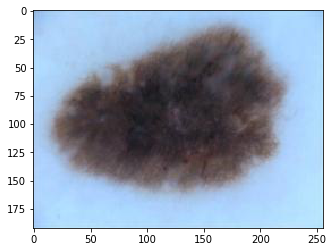

In [0]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers and deconvolutional layers

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [0]:
trainim.shape

(2464, 192, 256, 3)

In [0]:
np.max(testlab)

255

In [0]:
testlab.shape

(130, 192, 256)

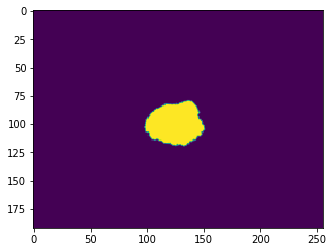

In [0]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

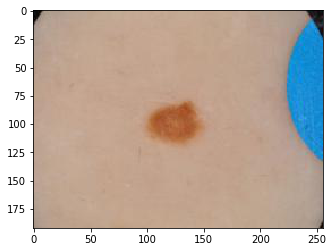

In [0]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3) 
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3) 
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

This is a Deconvolutional Layer

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

Finally, the output layer

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [0]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [0]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [0]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [0]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

Now add deconvolutional layers

In [0]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
(?, 24, 32, 256)


In [0]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [0]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [0]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [0]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [0]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

The OUTPUT 

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

Session

In [0]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


Train the Model in a Session

starting init
done init
Currently on step 0
the time is  2.6266560000000005 

Avg Jacc is:


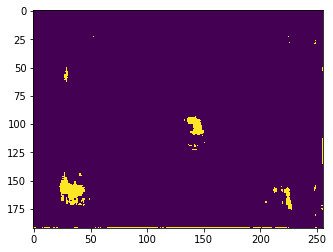

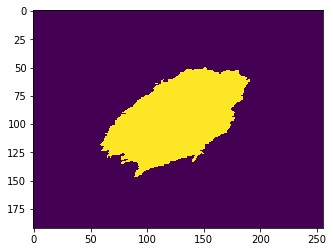

0.16277850224421575  step number is  0  batch_size is  16
Currently on step 100
the time is  14.707213000000003 

Avg Jacc is:


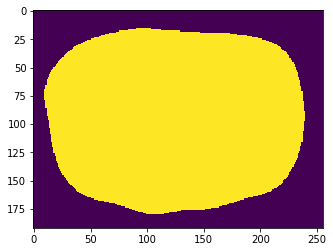

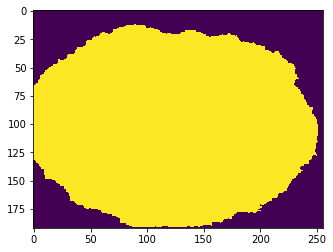

0.6070531991811899  step number is  100  batch_size is  16
Currently on step 200
the time is  25.218651 

Avg Jacc is:


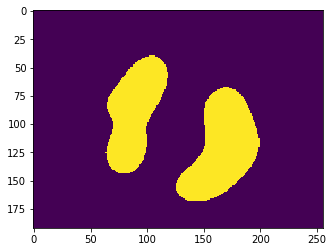

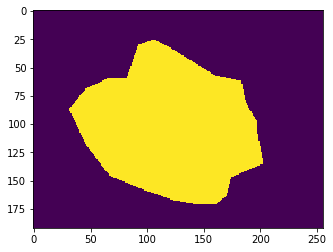

0.6740136953500601  step number is  200  batch_size is  16
Currently on step 300
the time is  35.798627 

Avg Jacc is:


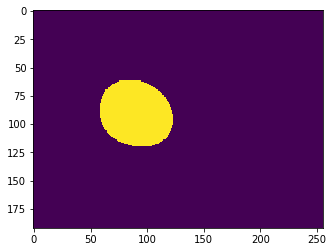

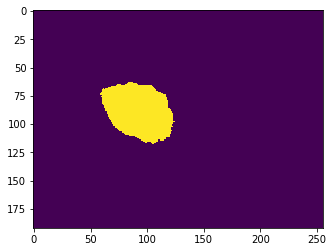

0.6760652395395133  step number is  300  batch_size is  16
Currently on step 400
the time is  46.402120000000004 

Avg Jacc is:


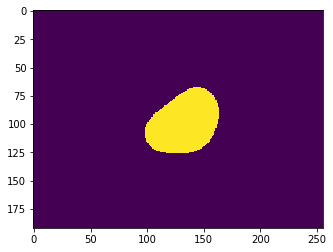

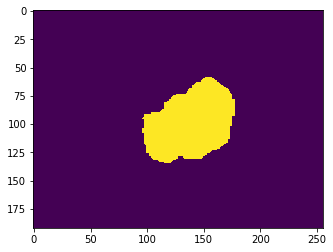

0.6884136493389423  step number is  400  batch_size is  16
Currently on step 500
the time is  56.897926999999996 

Avg Jacc is:


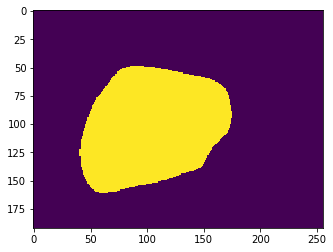

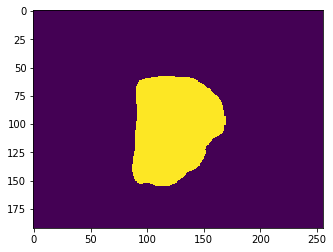

0.7241205655611478  step number is  500  batch_size is  16
Currently on step 600
the time is  67.40957 

Avg Jacc is:


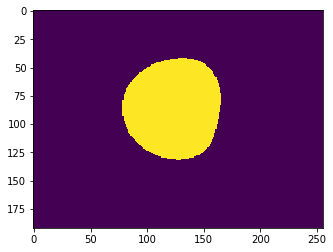

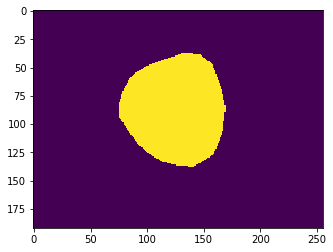

0.7406707763671875  step number is  600  batch_size is  16
Currently on step 700
the time is  77.94502800000001 

Avg Jacc is:


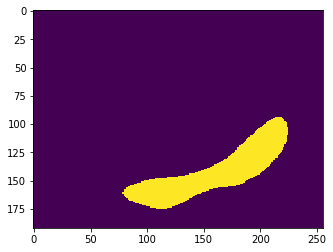

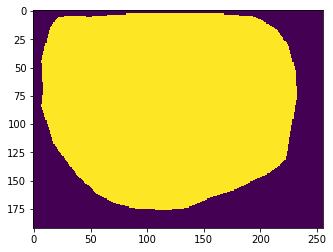

0.6932251563439003  step number is  700  batch_size is  16
Currently on step 800
the time is  88.498621 

Avg Jacc is:


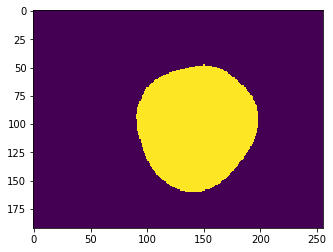

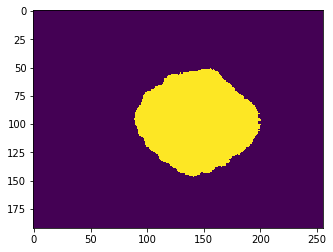

0.7308335524338943  step number is  800  batch_size is  16
Currently on step 900
the time is  98.97055900000001 

Avg Jacc is:


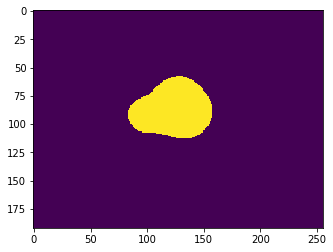

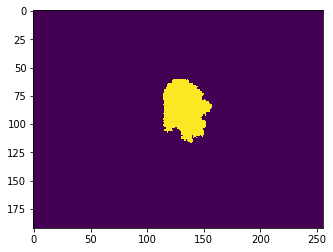

0.7490010188176082  step number is  900  batch_size is  16
Currently on step 1000
the time is  109.542599 

Avg Jacc is:


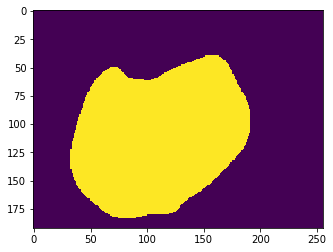

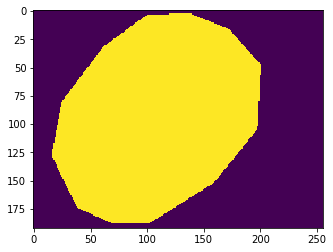

0.718955582838792  step number is  1000  batch_size is  16
Currently on step 1100
the time is  119.98995599999999 

Avg Jacc is:


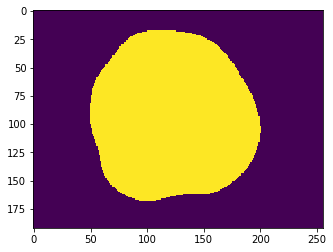

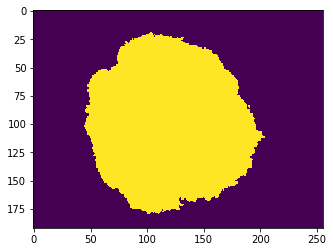

0.7092269897460938  step number is  1100  batch_size is  16
Currently on step 1200
the time is  130.558848 

Avg Jacc is:


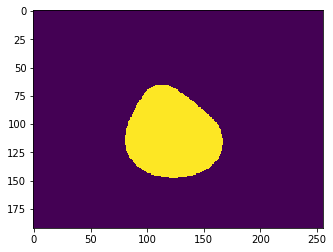

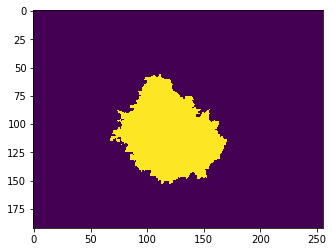

0.7308284466083234  step number is  1200  batch_size is  16
Currently on step 1300
the time is  141.09013800000002 

Avg Jacc is:


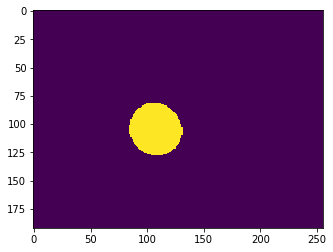

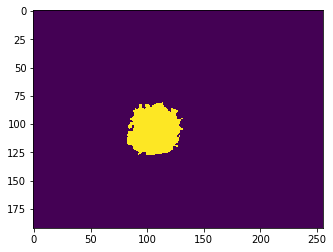

0.7517582233135517  step number is  1300  batch_size is  16
Currently on step 1400
the time is  151.750157 

Avg Jacc is:


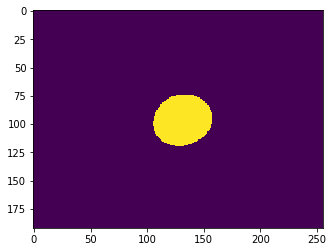

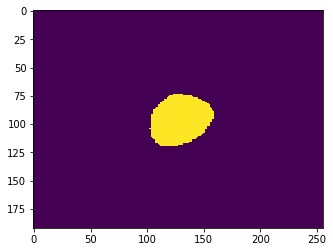

0.7207134540264423  step number is  1400  batch_size is  16
Currently on step 1500
the time is  162.316349 

Avg Jacc is:


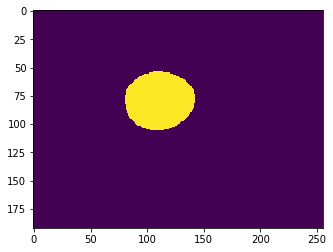

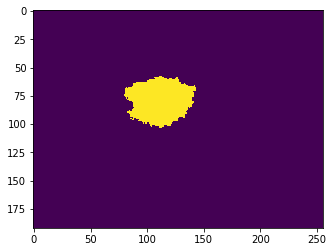

0.7373170119065505  step number is  1500  batch_size is  16
Currently on step 1600
the time is  172.966231 

Avg Jacc is:


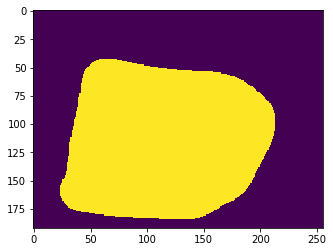

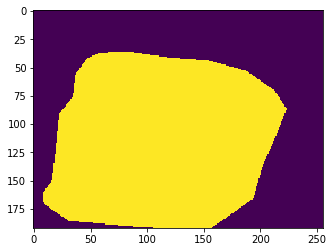

0.7275856604942909  step number is  1600  batch_size is  16
Currently on step 1700
the time is  183.59376400000002 

Avg Jacc is:


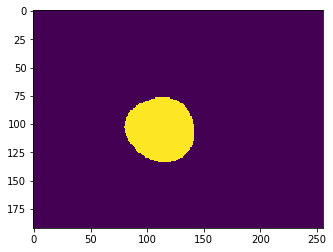

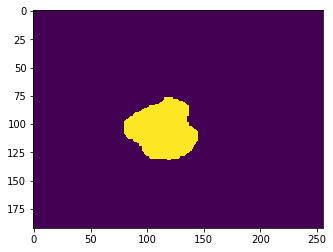

0.748145528940054  step number is  1700  batch_size is  16
Currently on step 1800
the time is  194.37219900000002 

Avg Jacc is:


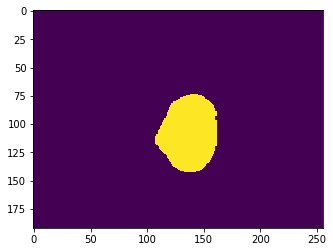

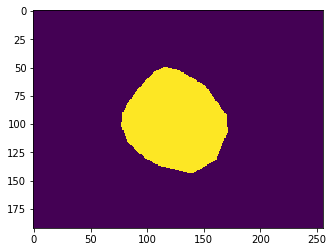

0.778381112905649  step number is  1800  batch_size is  16
Currently on step 1900
the time is  204.98699 

Avg Jacc is:


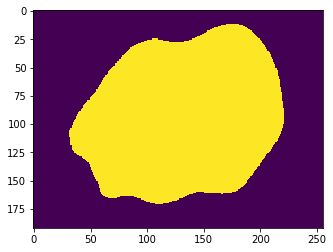

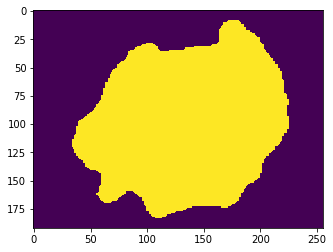

0.7464783888596754  step number is  1900  batch_size is  16
Currently on step 2000
the time is  215.6868 

Avg Jacc is:


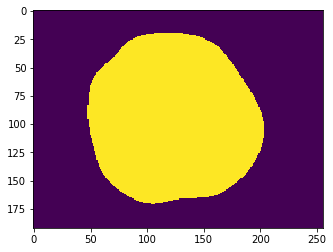

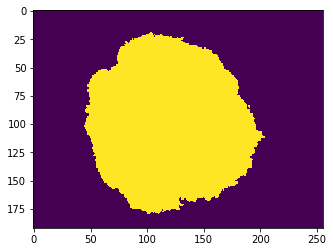

0.7691260704627404  step number is  2000  batch_size is  16
Currently on step 2100
the time is  226.401571 

Avg Jacc is:


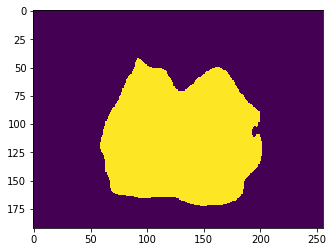

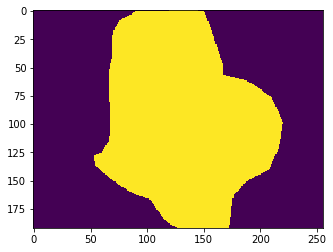

0.7688435481144832  step number is  2100  batch_size is  16
Currently on step 2200
the time is  237.14150899999999 

Avg Jacc is:


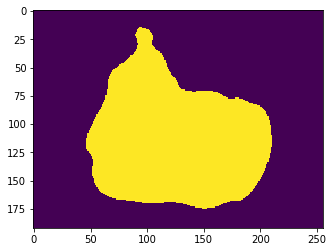

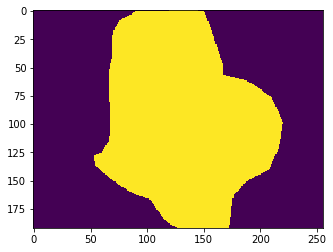

0.774406257042518  step number is  2200  batch_size is  16
Currently on step 2300
the time is  247.780957 

Avg Jacc is:


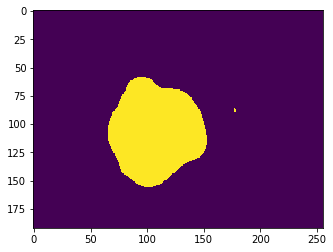

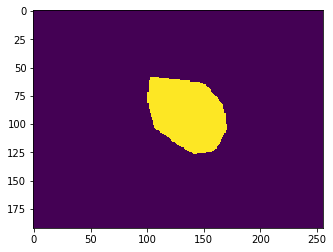

0.740878178523137  step number is  2300  batch_size is  16
Currently on step 2400
the time is  258.457966 

Avg Jacc is:


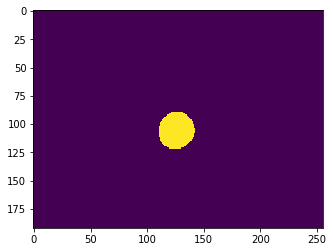

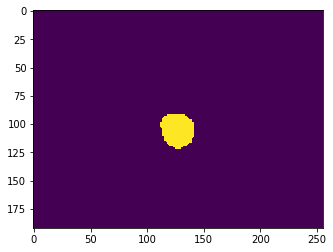

0.7637721135066106  step number is  2400  batch_size is  16
Currently on step 2500
the time is  269.092972 

Avg Jacc is:


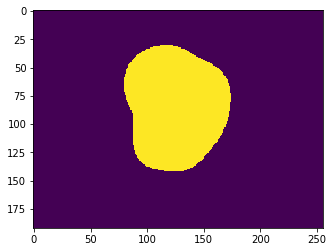

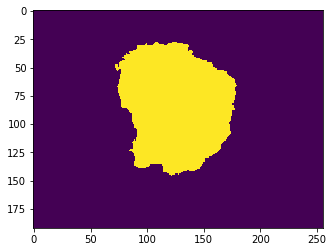

0.7592098529522235  step number is  2500  batch_size is  16
Currently on step 2600
the time is  279.838277 

Avg Jacc is:


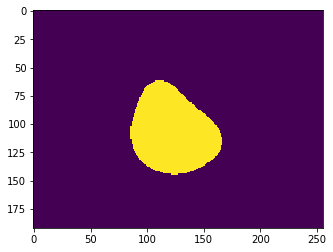

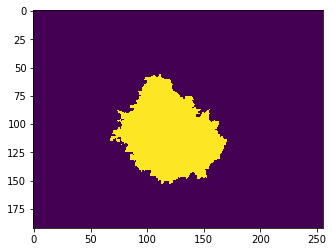

0.7660694415752705  step number is  2600  batch_size is  16
Currently on step 2700
the time is  290.498968 

Avg Jacc is:


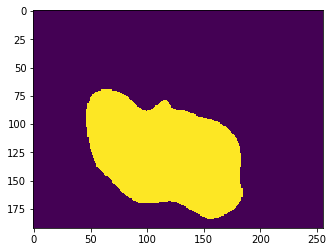

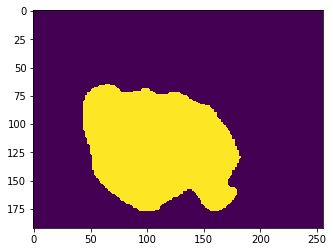

0.7612049396221454  step number is  2700  batch_size is  16
Currently on step 2800
the time is  301.156393 

Avg Jacc is:


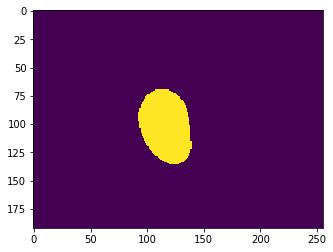

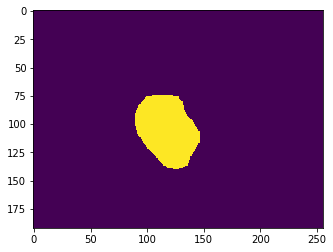

0.7500879141000601  step number is  2800  batch_size is  16
Currently on step 2900
the time is  311.889193 

Avg Jacc is:


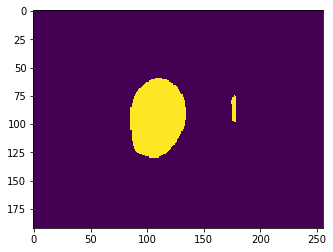

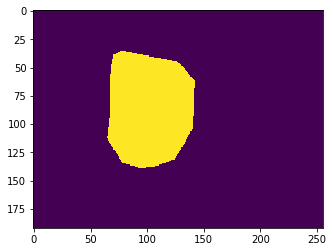

0.7664677546574519  step number is  2900  batch_size is  16
Currently on step 3000
the time is  322.66403099999997 

Avg Jacc is:


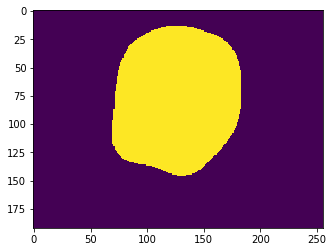

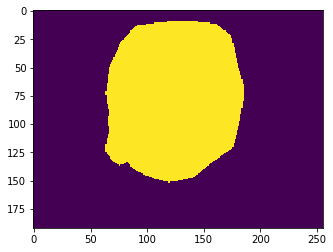

0.772468742957482  step number is  3000  batch_size is  16
Currently on step 3100
the time is  333.367997 

Avg Jacc is:


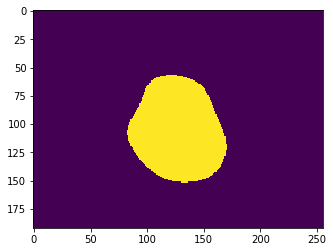

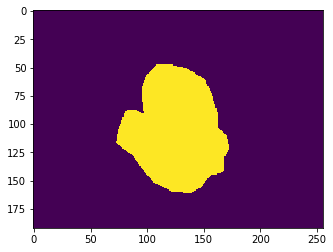

0.7264350891113281  step number is  3100  batch_size is  16
Currently on step 3200
the time is  344.02653699999996 

Avg Jacc is:


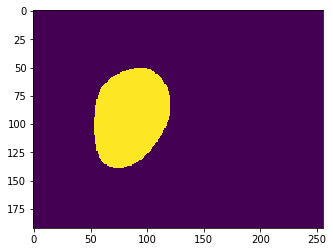

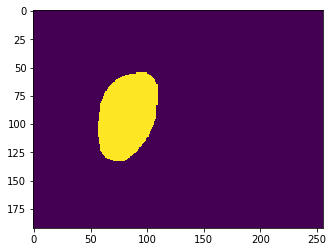

0.7586446908804086  step number is  3200  batch_size is  16
Currently on step 3300
the time is  354.74589 

Avg Jacc is:


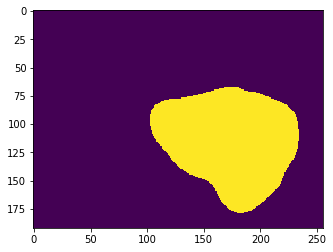

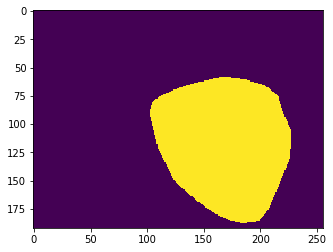

0.7442064725435698  step number is  3300  batch_size is  16
Currently on step 3400
the time is  365.396197 

Avg Jacc is:


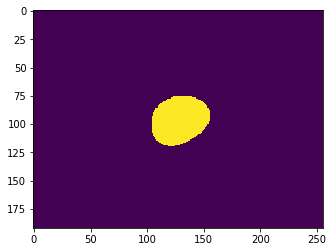

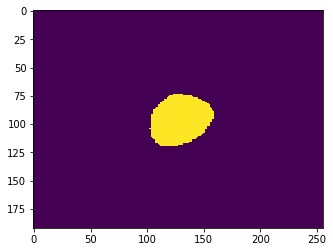

0.7845878014197716  step number is  3400  batch_size is  16
Currently on step 3500
the time is  376.191737 

Avg Jacc is:


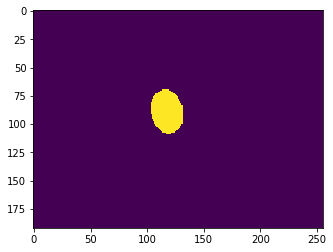

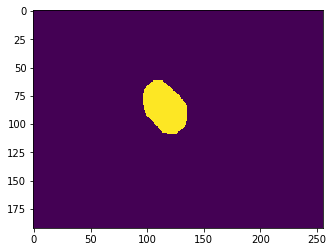

0.7699526273287259  step number is  3500  batch_size is  16
Currently on step 3600
the time is  386.838575 

Avg Jacc is:


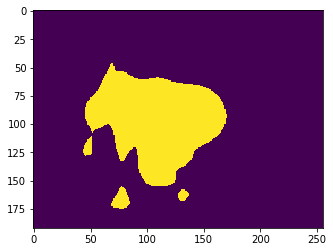

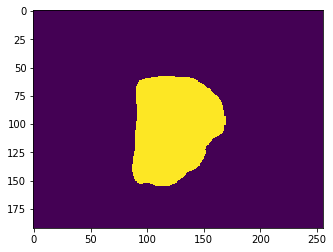

0.76244383591872  step number is  3600  batch_size is  16
Currently on step 3700
the time is  397.457864 

Avg Jacc is:


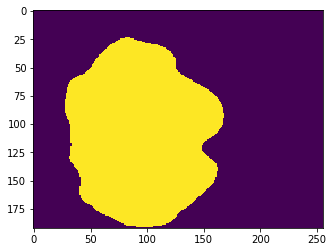

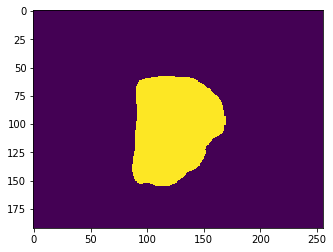

0.7705398559570312  step number is  3700  batch_size is  16
Currently on step 3800
the time is  408.104599 

Avg Jacc is:


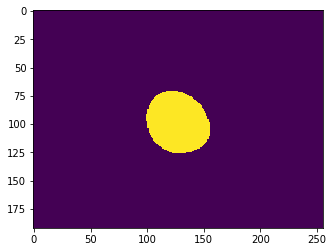

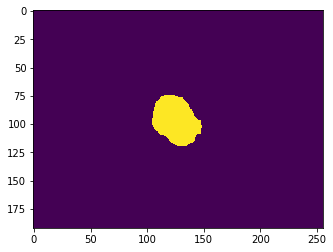

0.7658170259915865  step number is  3800  batch_size is  16
Currently on step 3900
the time is  418.735207 

Avg Jacc is:


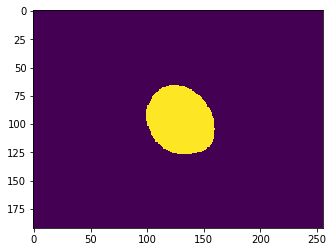

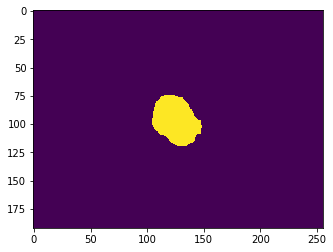

0.7646012526292068  step number is  3900  batch_size is  16
Currently on step 4000
the time is  429.371103 

Avg Jacc is:


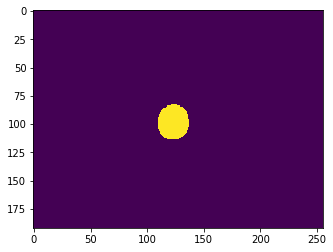

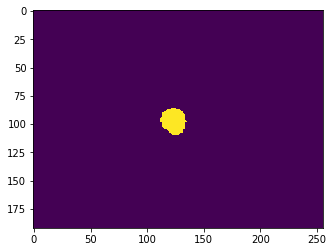

0.7640149630033053  step number is  4000  batch_size is  16
Currently on step 4100
the time is  440.040347 

Avg Jacc is:


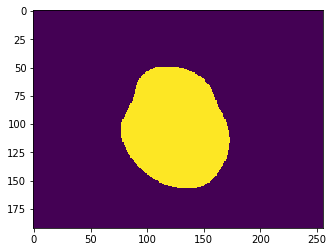

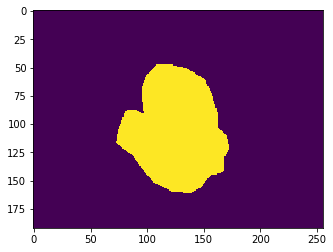

0.7616936903733473  step number is  4100  batch_size is  16
Currently on step 4200
the time is  450.705642 

Avg Jacc is:


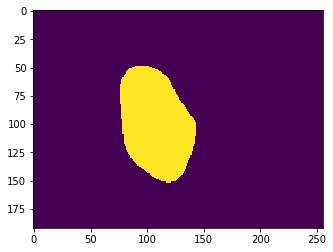

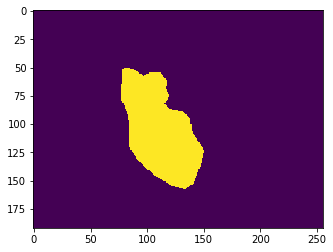

0.7593345642089844  step number is  4200  batch_size is  16
Currently on step 4300
the time is  461.31902099999996 

Avg Jacc is:


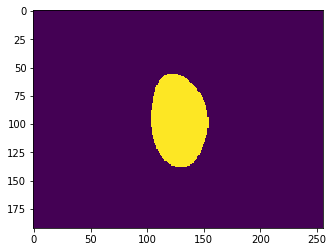

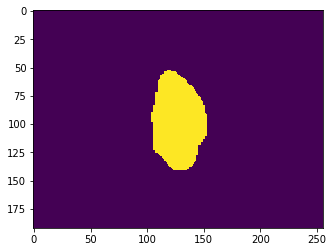

0.771883803147536  step number is  4300  batch_size is  16
Currently on step 4400
the time is  472.043868 

Avg Jacc is:


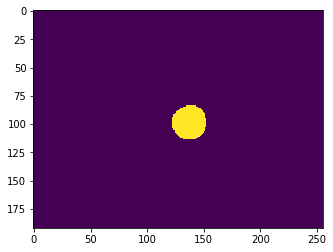

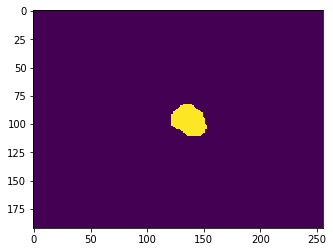

0.7695534339317909  step number is  4400  batch_size is  16
Currently on step 4500
the time is  482.70934 

Avg Jacc is:


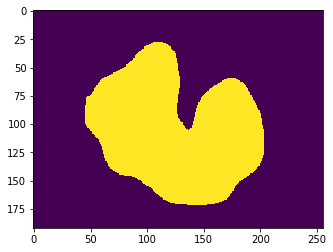

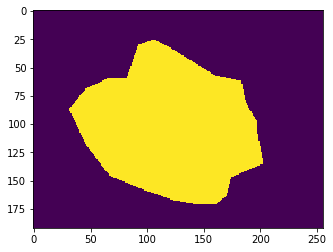

0.7686204176682693  step number is  4500  batch_size is  16
Currently on step 4600
the time is  493.428626 

Avg Jacc is:


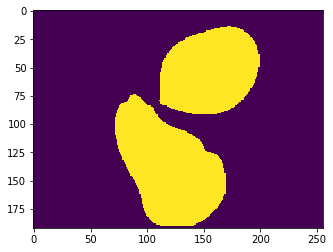

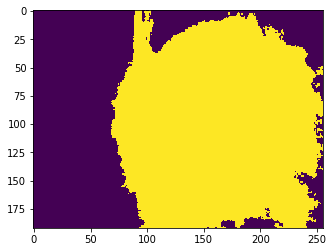

0.7695671668419471  step number is  4600  batch_size is  16
Currently on step 4700
the time is  504.078561 

Avg Jacc is:


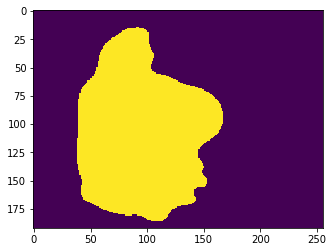

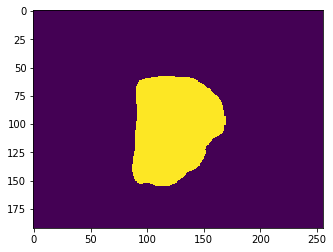

0.7799227201021635  step number is  4700  batch_size is  16
Currently on step 4800
the time is  514.761477 

Avg Jacc is:


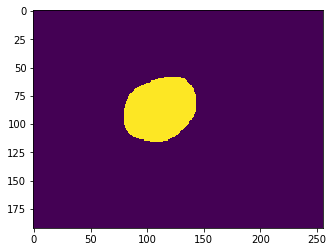

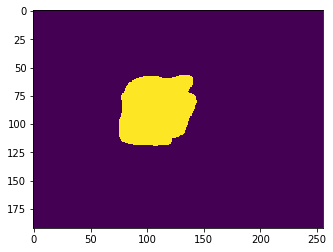

0.7669101421649639  step number is  4800  batch_size is  16
Currently on step 4900
the time is  525.430461 

Avg Jacc is:


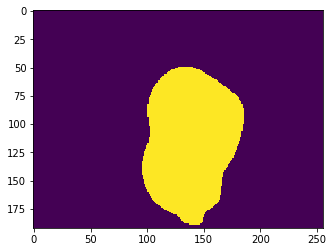

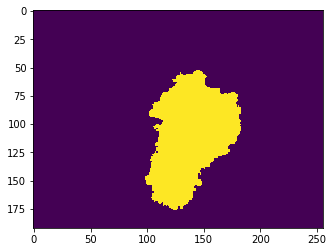

0.7556389441856971  step number is  4900  batch_size is  16
Currently on step 5000
the time is  536.04795 

Avg Jacc is:


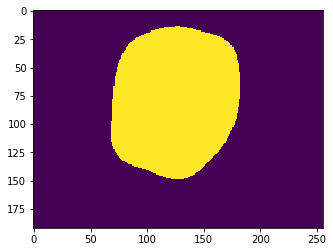

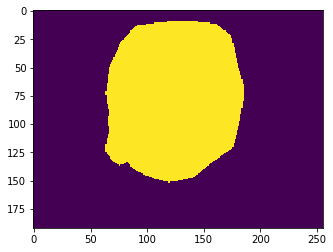

0.7804460965670073  step number is  5000  batch_size is  16
Currently on step 5100
the time is  546.7169100000001 

Avg Jacc is:


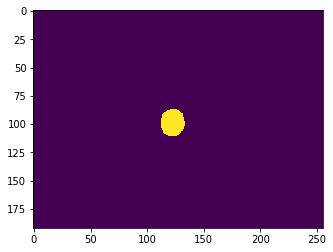

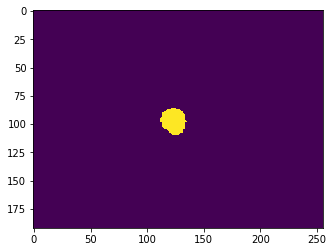

0.7683557363656851  step number is  5100  batch_size is  16
Currently on step 5200
the time is  557.38324 

Avg Jacc is:


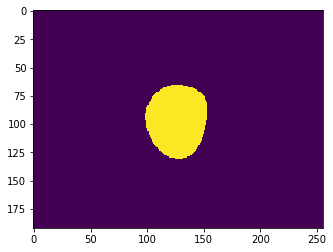

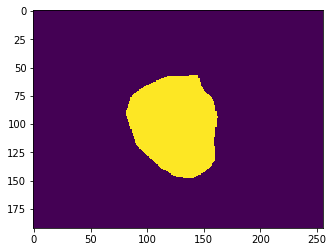

0.7714594327486478  step number is  5200  batch_size is  16
Currently on step 5300
the time is  568.255111 

Avg Jacc is:


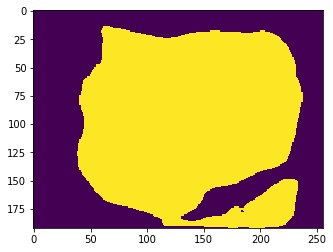

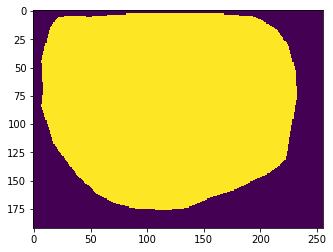

0.759054917555589  step number is  5300  batch_size is  16
Currently on step 5400
the time is  578.923351 

Avg Jacc is:


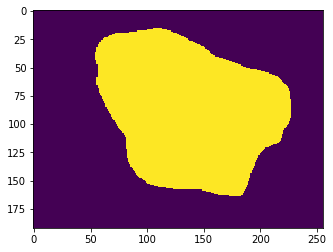

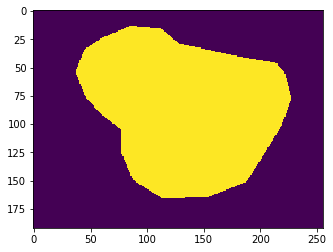

0.7689649141751803  step number is  5400  batch_size is  16
Currently on step 5500
the time is  589.567227 

Avg Jacc is:


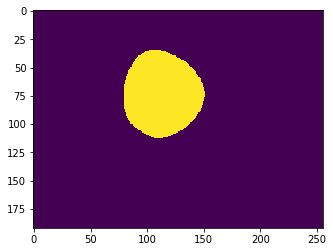

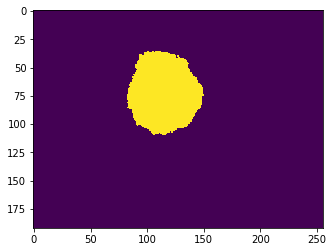

0.788131831242488  step number is  5500  batch_size is  16
Currently on step 5600
the time is  600.276166 

Avg Jacc is:


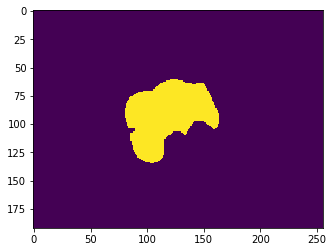

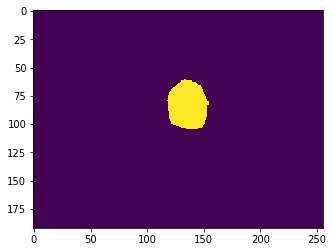

0.7659122173602765  step number is  5600  batch_size is  16
Currently on step 5700
the time is  611.018732 

Avg Jacc is:


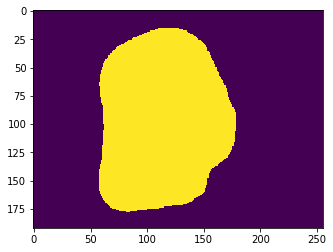

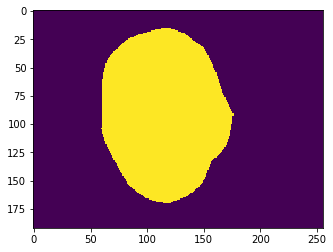

0.7575586172250601  step number is  5700  batch_size is  16
Currently on step 5800
the time is  621.736886 

Avg Jacc is:


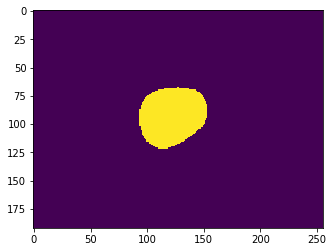

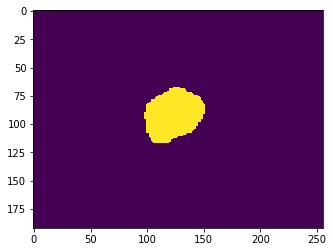

0.7523507925180288  step number is  5800  batch_size is  16
Currently on step 5900
the time is  632.3942380000001 

Avg Jacc is:


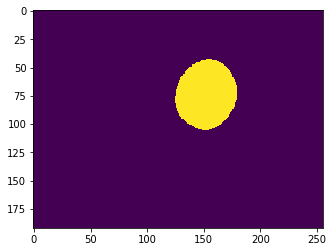

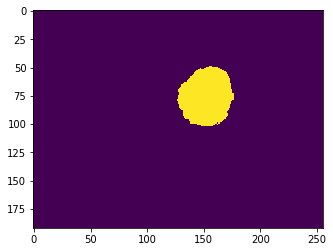

0.7856393080491286  step number is  5900  batch_size is  16
Currently on step 6000
the time is  643.05587 

Avg Jacc is:


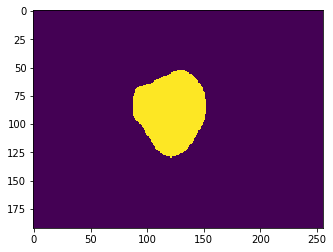

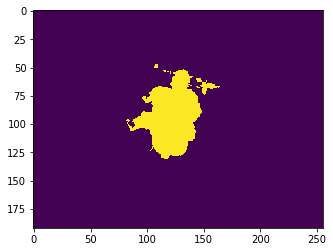

0.7734788161057692  step number is  6000  batch_size is  16
Currently on step 6100
the time is  653.768403 

Avg Jacc is:


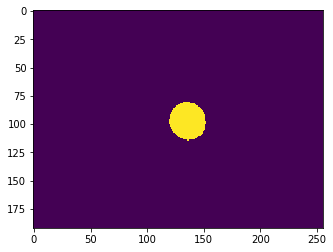

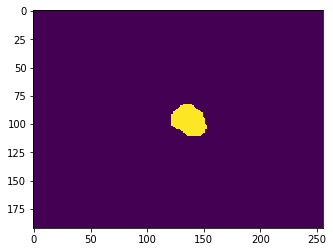

0.7723260732797476  step number is  6100  batch_size is  16
Currently on step 6200
the time is  664.386338 

Avg Jacc is:


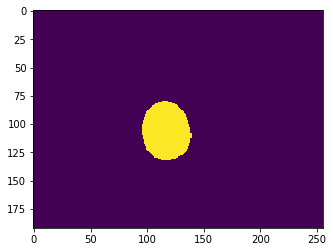

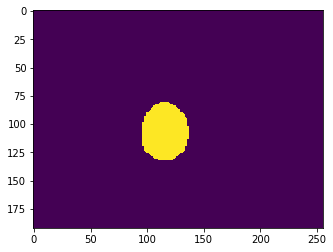

0.7561651376577524  step number is  6200  batch_size is  16
Currently on step 6300
the time is  675.125798 

Avg Jacc is:


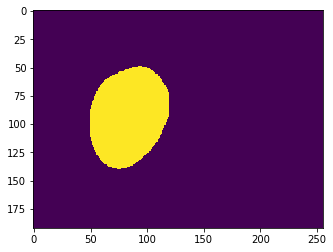

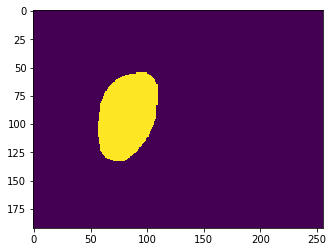

0.7830277663010817  step number is  6300  batch_size is  16
Currently on step 6400
the time is  685.9012650000001 

Avg Jacc is:


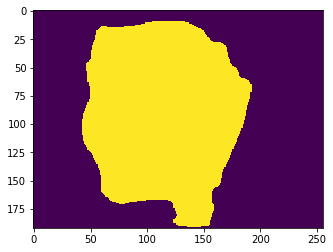

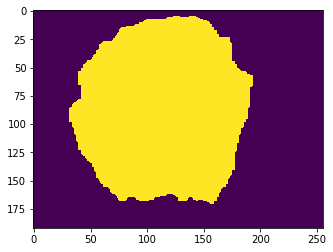

0.7769922696627103  step number is  6400  batch_size is  16
Currently on step 6500
the time is  696.555599 

Avg Jacc is:


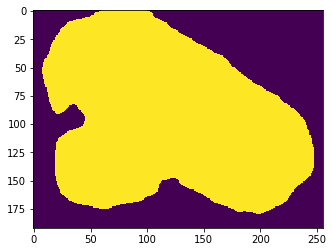

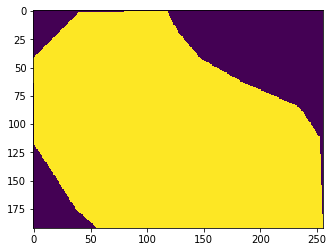

0.7669673039362981  step number is  6500  batch_size is  16
Currently on step 6600
the time is  707.307912 

Avg Jacc is:


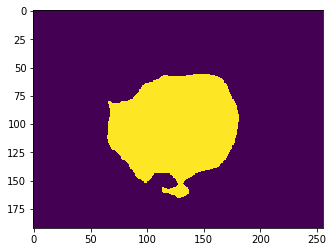

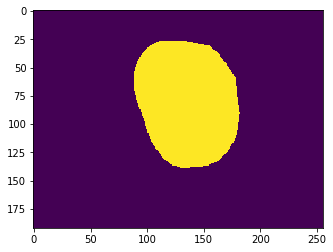

0.7681612454927884  step number is  6600  batch_size is  16
Currently on step 6700
the time is  718.0198220000001 

Avg Jacc is:


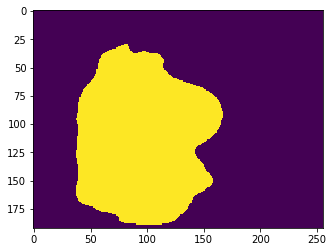

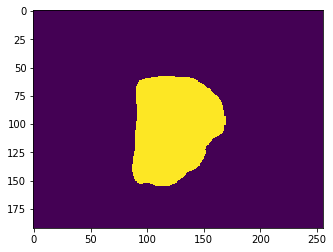

0.7769213749812199  step number is  6700  batch_size is  16
Currently on step 6800
the time is  728.798222 

Avg Jacc is:


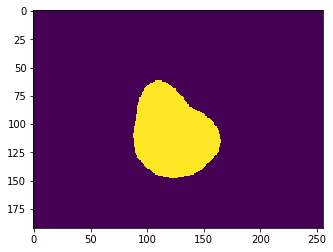

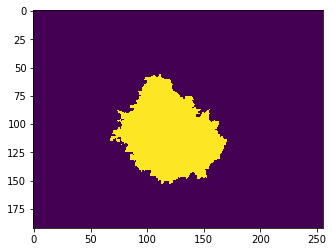

0.7587939922626202  step number is  6800  batch_size is  16
Currently on step 6900
the time is  739.57734 

Avg Jacc is:


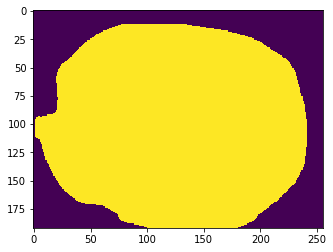

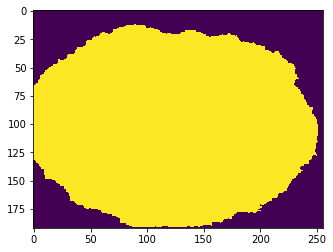

0.7781278170072116  step number is  6900  batch_size is  16
Currently on step 7000
the time is  750.4738570000001 

Avg Jacc is:


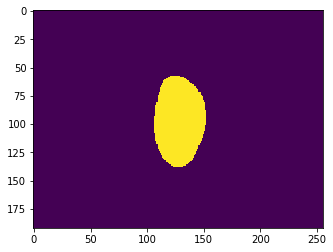

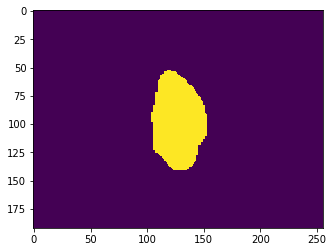

0.7798177278958834  step number is  7000  batch_size is  16
Currently on step 7100
the time is  761.152136 

Avg Jacc is:


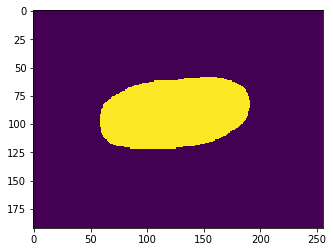

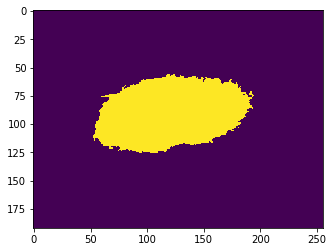

0.7715815030611478  step number is  7100  batch_size is  16
Currently on step 7200
the time is  771.8135420000001 

Avg Jacc is:


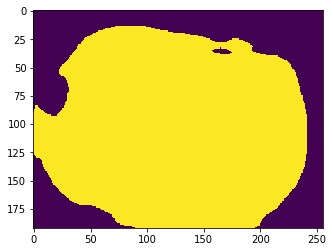

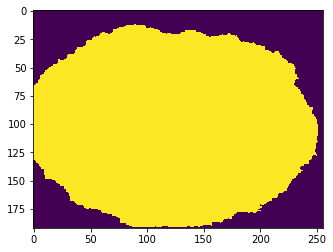

0.7719293447641226  step number is  7200  batch_size is  16
Currently on step 7300
the time is  782.472128 

Avg Jacc is:


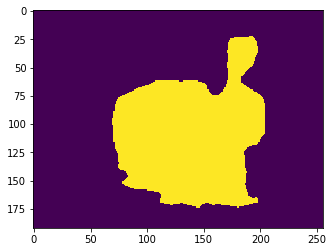

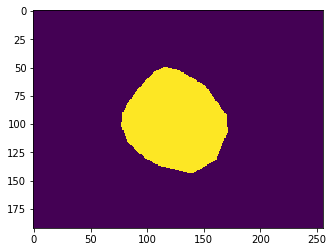

0.763467524601863  step number is  7300  batch_size is  16
Currently on step 7400
the time is  793.1175370000001 

Avg Jacc is:


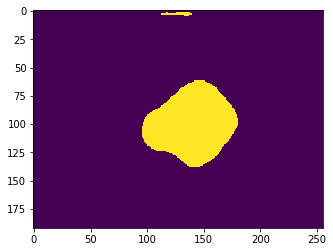

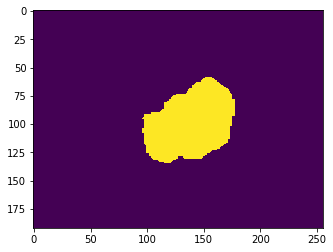

0.7618669950045072  step number is  7400  batch_size is  16
Currently on step 7500
the time is  803.8424630000001 

Avg Jacc is:


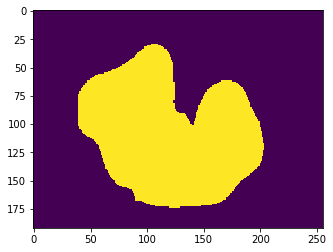

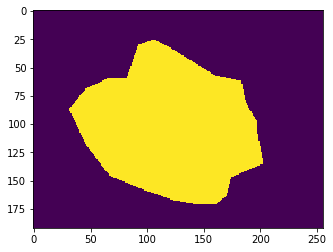

0.772637704702524  step number is  7500  batch_size is  16
Currently on step 7600
the time is  814.447844 

Avg Jacc is:


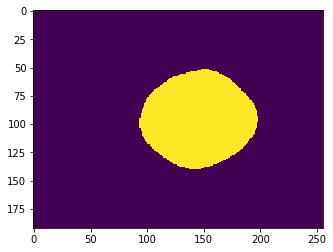

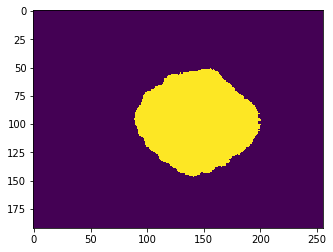

0.7635694063626803  step number is  7600  batch_size is  16
Currently on step 7700
the time is  825.1505930000001 

Avg Jacc is:


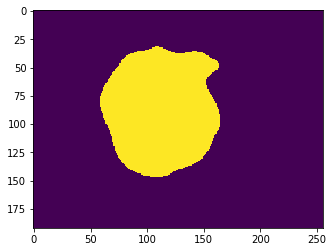

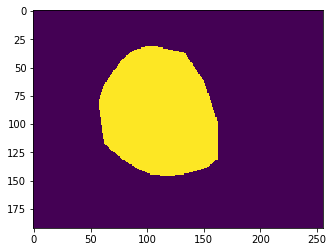

0.7601722717285156  step number is  7700  batch_size is  16
Currently on step 7800
the time is  835.832617 

Avg Jacc is:


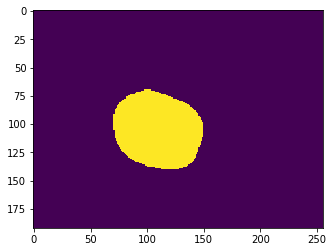

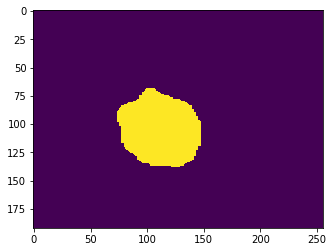

0.7752613947941707  step number is  7800  batch_size is  16
Currently on step 7900
the time is  846.4994240000001 

Avg Jacc is:


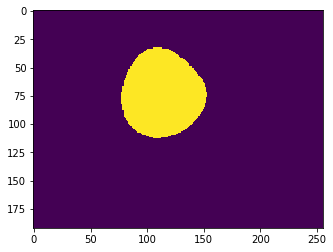

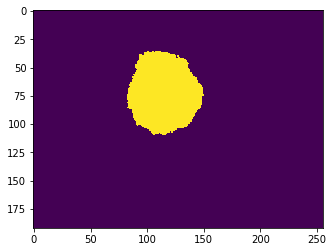

0.7862838158240685  step number is  7900  batch_size is  16
Currently on step 8000
the time is  857.1998130000001 

Avg Jacc is:


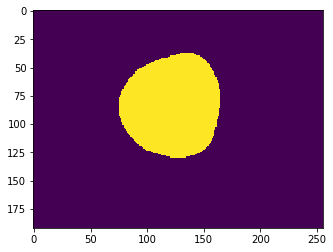

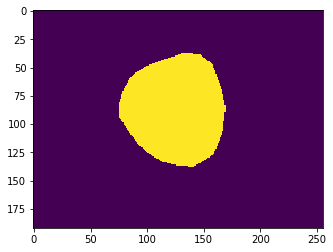

0.7824063227726863  step number is  8000  batch_size is  16
Currently on step 8100
the time is  867.817526 

Avg Jacc is:


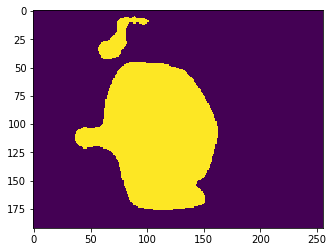

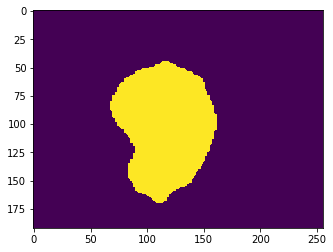

0.7669802739070012  step number is  8100  batch_size is  16
Currently on step 8200
the time is  878.559103 

Avg Jacc is:


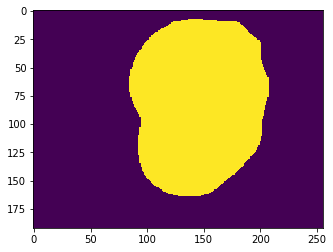

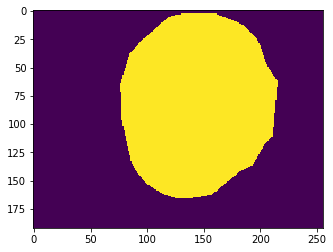

0.7814079871544471  step number is  8200  batch_size is  16
Currently on step 8300
the time is  889.198928 

Avg Jacc is:


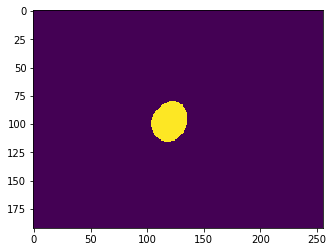

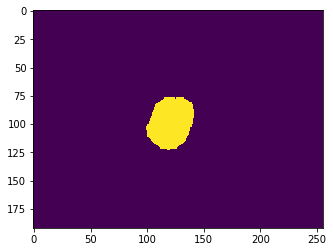

0.7741375262920673  step number is  8300  batch_size is  16
Currently on step 8400
the time is  899.925502 

Avg Jacc is:


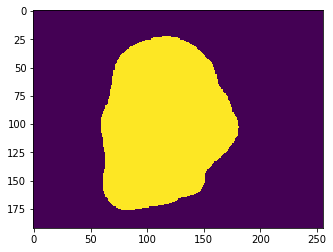

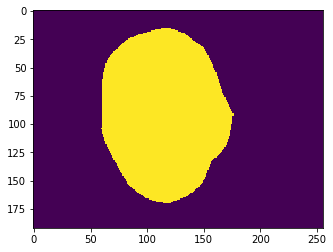

0.7612810575045073  step number is  8400  batch_size is  16
Currently on step 8500
the time is  910.642813 

Avg Jacc is:


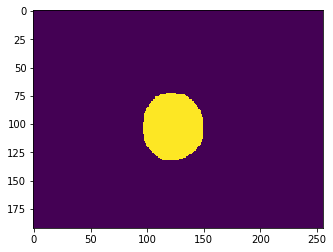

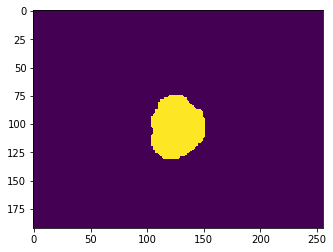

0.7657301095815805  step number is  8500  batch_size is  16
Currently on step 8600
the time is  921.322654 

Avg Jacc is:


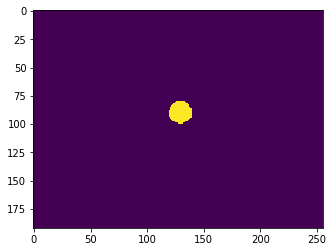

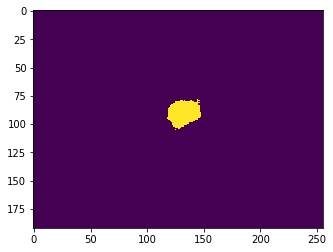

0.7571669358473557  step number is  8600  batch_size is  16
Currently on step 8700
the time is  932.0073980000001 

Avg Jacc is:


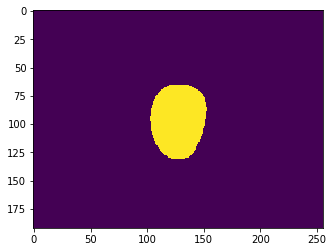

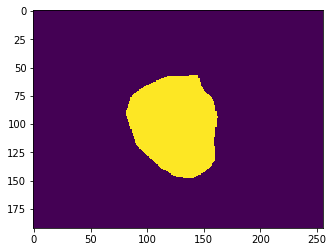

0.7668971721942608  step number is  8700  batch_size is  16
Currently on step 8800
the time is  942.8453880000001 

Avg Jacc is:


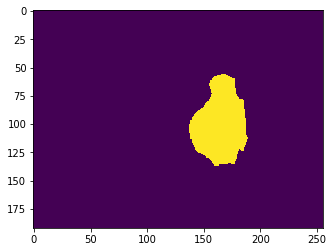

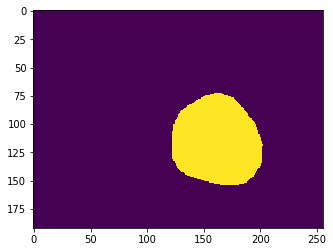

0.7668768075796274  step number is  8800  batch_size is  16
Currently on step 8900
the time is  953.591771 

Avg Jacc is:


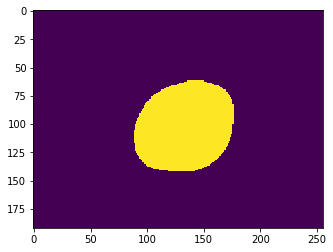

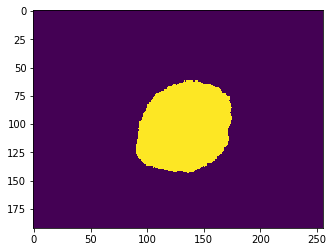

0.7719354482797476  step number is  8900  batch_size is  16
Currently on step 9000
the time is  964.2899560000001 

Avg Jacc is:


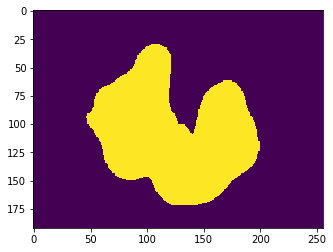

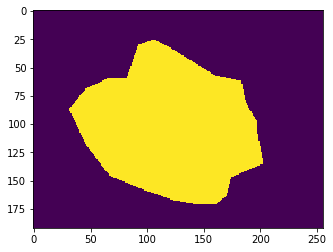

0.7674915020282452  step number is  9000  batch_size is  16
Currently on step 9100
the time is  975.053703 

Avg Jacc is:


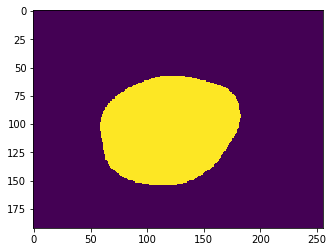

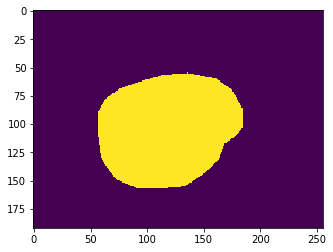

0.7794886075533354  step number is  9100  batch_size is  16
Currently on step 9200
the time is  985.911641 

Avg Jacc is:


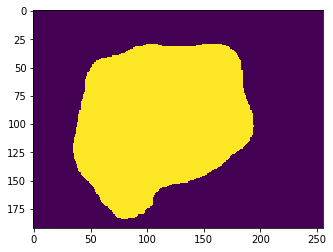

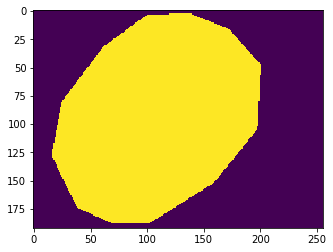

0.7726645249586839  step number is  9200  batch_size is  16
Currently on step 9300
the time is  996.465952 

Avg Jacc is:


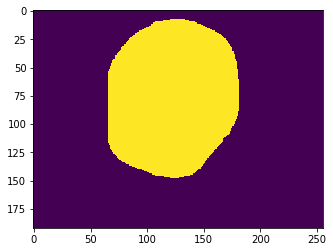

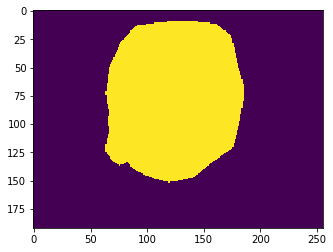

0.770193598820613  step number is  9300  batch_size is  16
Currently on step 9400
the time is  1007.1679920000001 

Avg Jacc is:


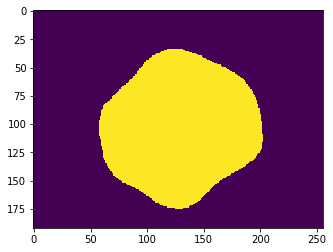

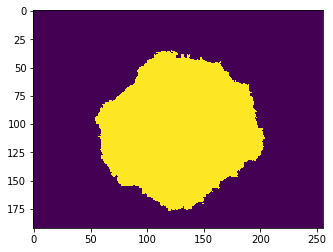

0.7658843407264122  step number is  9400  batch_size is  16
Currently on step 9500
the time is  1017.9387590000001 

Avg Jacc is:


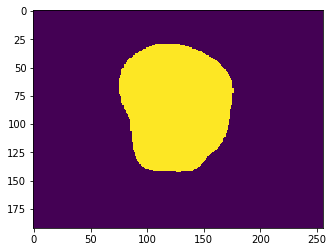

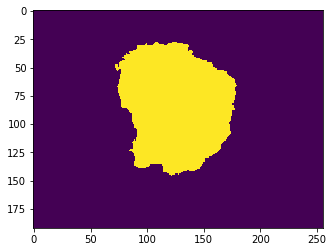

0.7630357008713943  step number is  9500  batch_size is  16
Currently on step 9600
the time is  1028.666939 

Avg Jacc is:


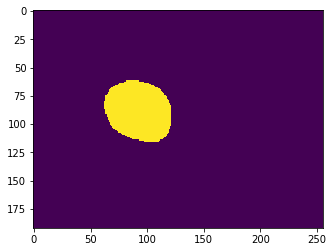

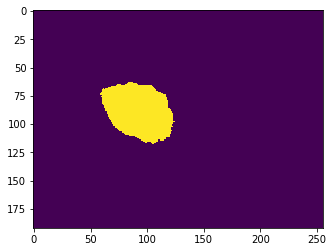

0.7650729252741887  step number is  9600  batch_size is  16
Currently on step 9700
the time is  1039.343498 

Avg Jacc is:


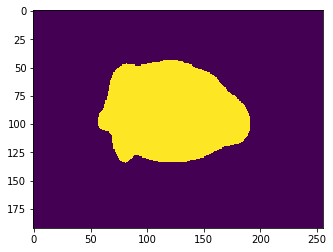

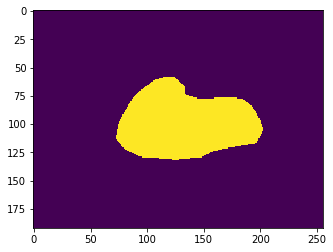

0.7712850717397837  step number is  9700  batch_size is  16
Currently on step 9800
the time is  1050.070088 

Avg Jacc is:


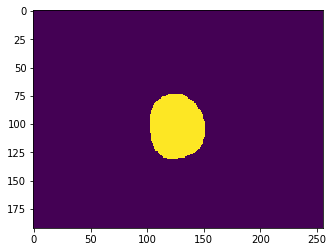

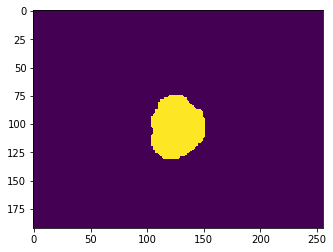

0.7801358736478365  step number is  9800  batch_size is  16
Currently on step 9900
the time is  1060.76585 

Avg Jacc is:


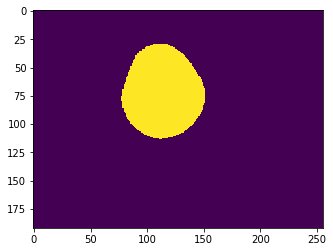

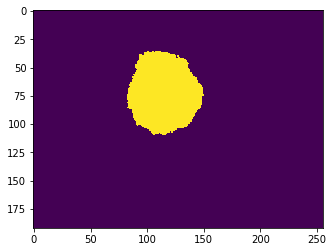

0.7655032818134014  step number is  9900  batch_size is  16
Currently on step 10000
the time is  1071.547066 

Avg Jacc is:


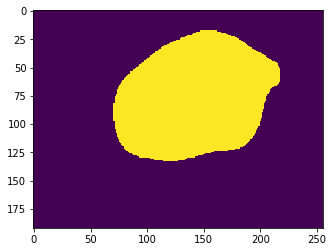

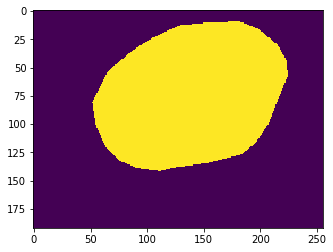

0.7692941518930289  step number is  10000  batch_size is  16
Currently on step 10100
the time is  1082.309807 

Avg Jacc is:


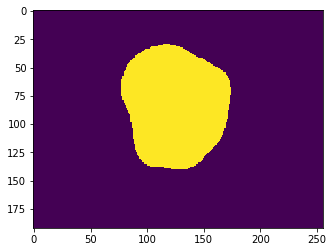

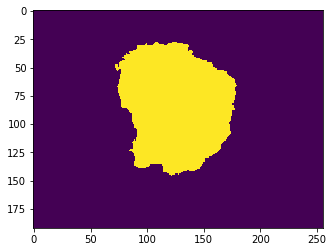

0.76277589064378  step number is  10100  batch_size is  16
Currently on step 10200
the time is  1093.097961 

Avg Jacc is:


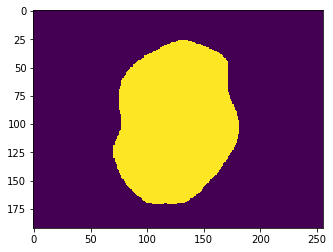

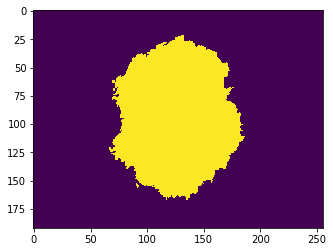

0.7561231759878305  step number is  10200  batch_size is  16
Currently on step 10300
the time is  1103.796167 

Avg Jacc is:


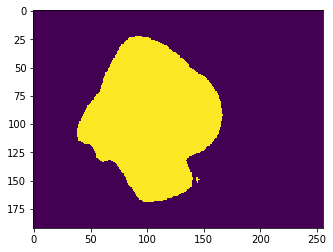

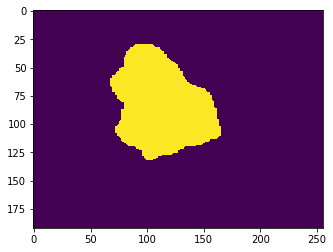

0.778079106257512  step number is  10300  batch_size is  16
Currently on step 10400
the time is  1114.478002 

Avg Jacc is:


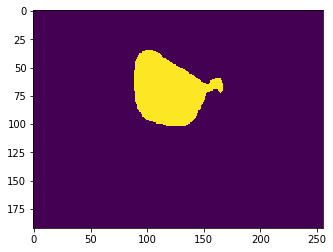

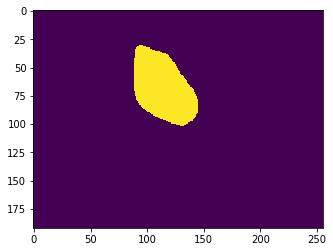

0.7691564706655649  step number is  10400  batch_size is  16


In [0]:
steps = 10500
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             
            
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)

            #compute the jacc

            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
            print("predicted segmentation \n")
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            print("ground_truth segmentation \n")
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set (now 5%)
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
          
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        save_path = saver.save(sess, "./model.ckpt")
        
        

In [0]:
J_out[1].shape

(130, 192, 256)

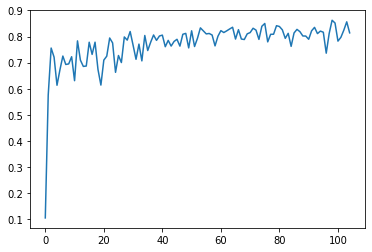

In [0]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

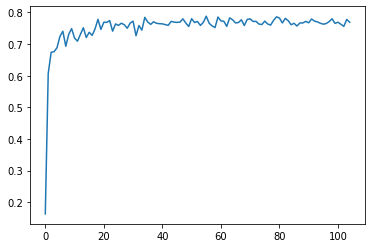

In [0]:

plt.plot(j_test)

(array([ 3.,  2.,  2.,  3.,  5.,  4., 12., 23., 32., 44.]),
 array([0.1813402 , 0.25726745, 0.3331947 , 0.40912193, 0.4850492 ,
        0.56097645, 0.6369037 , 0.71283096, 0.78875816, 0.8646854 ,
        0.9406127 ], dtype=float32),
 <a list of 10 Patch objects>)

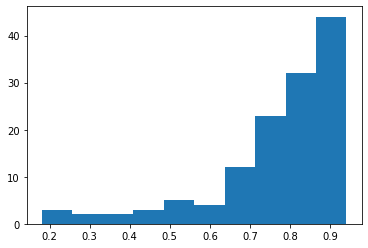

In [0]:
plt.hist(J_out[0])

(array([1., 0., 1., 1., 3., 0., 3., 2., 0., 5.]),
 array([0.68982494, 0.7094831 , 0.72914124, 0.7487994 , 0.76845753,
        0.7881157 , 0.8077738 , 0.827432  , 0.8470901 , 0.8667483 ,
        0.8864064 ], dtype=float32),
 <a list of 10 Patch objects>)

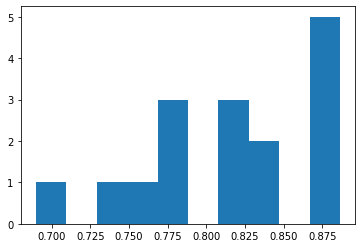

In [0]:
plt.hist(J_out_t[0])

In [0]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

0.16153846153846155

## Great Job!

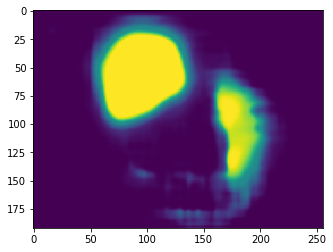

In [0]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [0]:
pigs.shape

(18, 192, 256, 3)

In [0]:
pred_pigment[0].shape

(18, 192, 256)

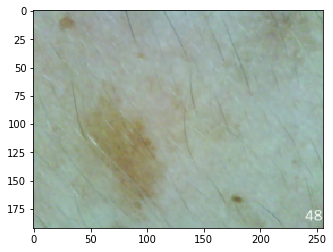

In [0]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
def visual_progress():

  mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
  for i in range(28):
    mask[:,:,0] = np.around(pred_pigment[0][i])
    mask[:,:,1] = np.around(pred_pigment[0][i])
    mask[:,:,2] = np.around(pred_pigment[0][i])


    image = pigs[i]
    plt.imshow(image)
    plt.show()
    notmask = 1- mask
    image2 = image*mask
    image1 = image*(1- mask)

    image2_avgr = np.average(image2[:,:,0], weights = mask[:,:,0])
    image2_avgg = np.average(image2[:,:,1], weights = mask[:,:,1]) 
    image2_avgb = np.average(image2[:,:,2], weights = mask[:,:,2])

    image1_avgr = np.average(image1[:,:,0], weights = notmask[:,:,0])
    image1_avgg = np.average(image1[:,:,1], weights = notmask[:,:,1]) 
    image1_avgb = np.average(image1[:,:,2], weights = notmask[:,:,2])

    image2_avg = np.zeros(image2.shape)
    image1_avg = np.zeros(image1.shape)
    image2_avg[:,:,0] = image2_avgr
    image2_avg[:,:,1] = image2_avgg
    image2_avg[:,:,2] = image2_avgb

    image1_avg[:,:,0] = image1_avgr
    image1_avg[:,:,1] = image1_avgg
    image1_avg[:,:,2] = image1_avgb
#mask = 1-mask
#mask = mask.astype(int)
    plt.imshow(image2_avg)
    plt.show()
  
#image[mask] = 0

    plt.imshow(image1_avg)
    plt.show()

    plt.imshow(image2)
    plt.show()
    plt.imshow(image1)
    plt.show()

    print("next day..\n")
  return()

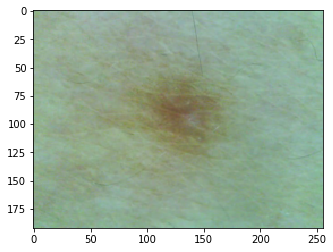

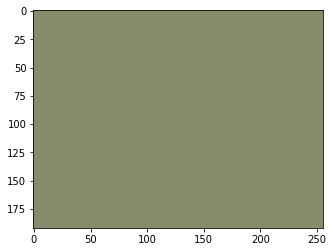

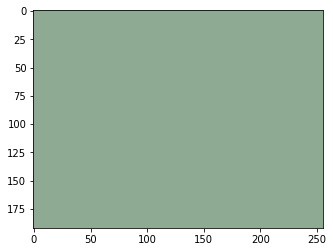

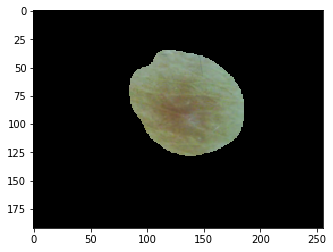

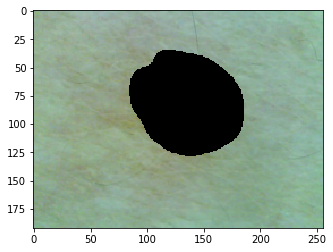

next day..



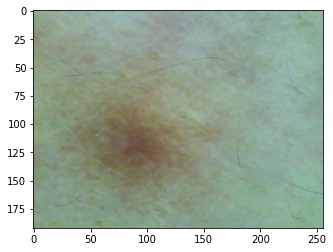

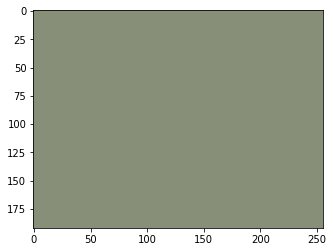

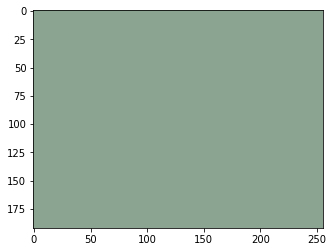

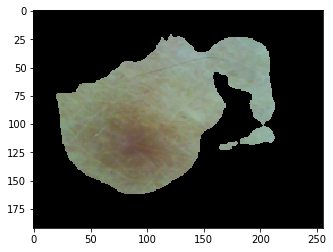

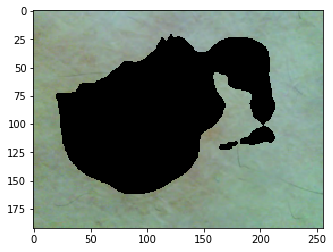

next day..



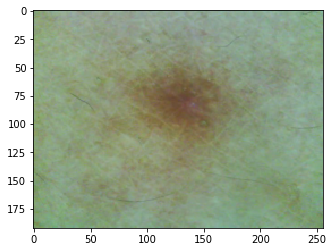

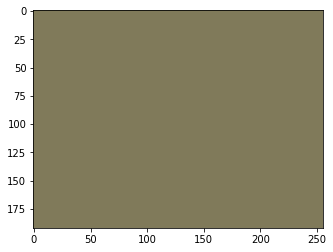

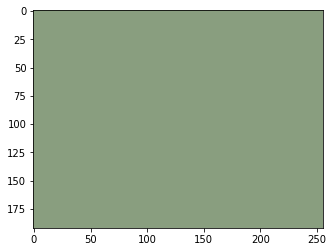

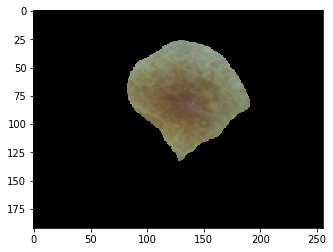

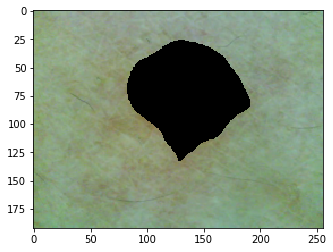

next day..



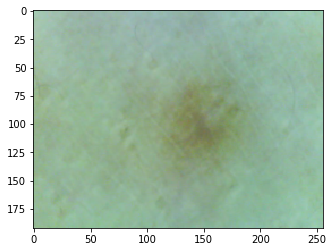

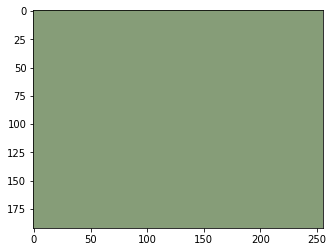

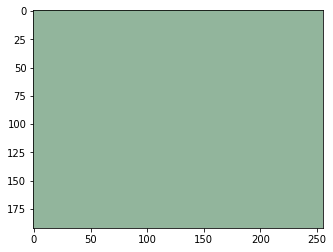

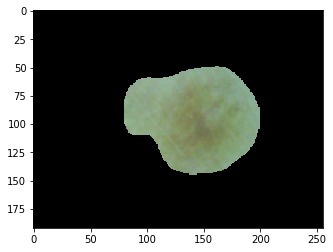

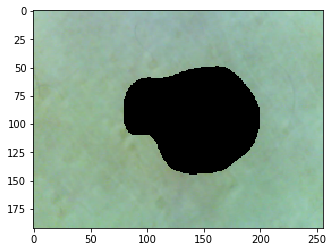

next day..



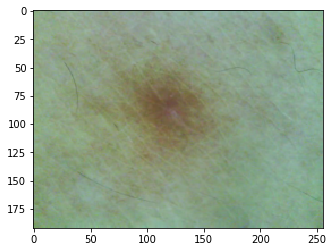

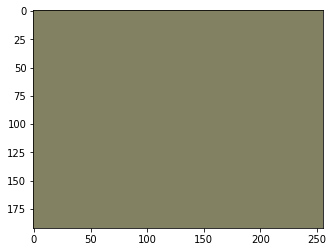

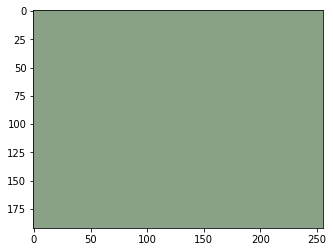

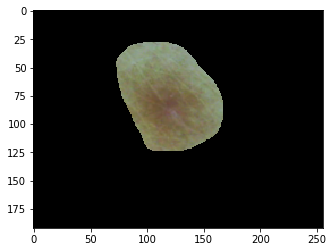

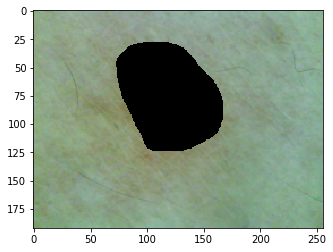

next day..



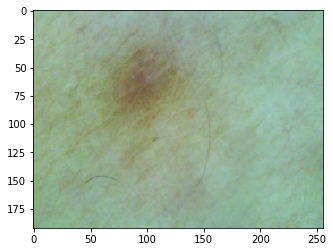

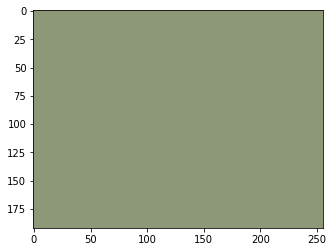

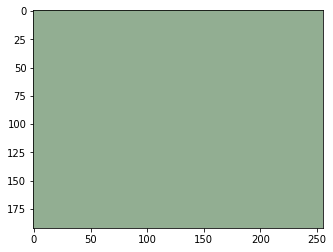

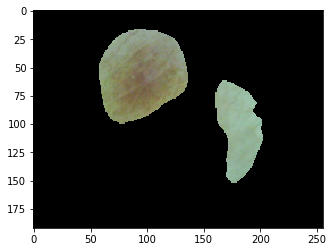

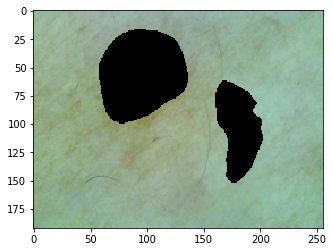

next day..



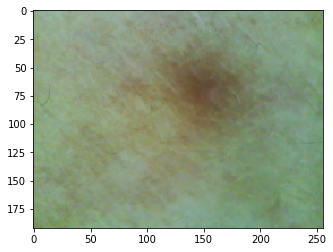

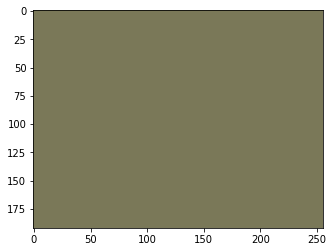

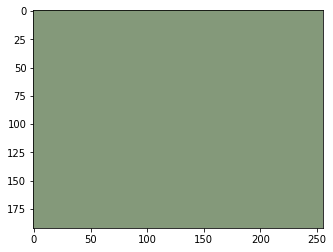

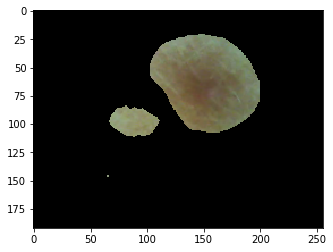

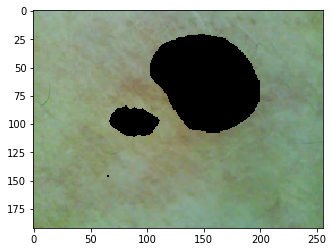

next day..



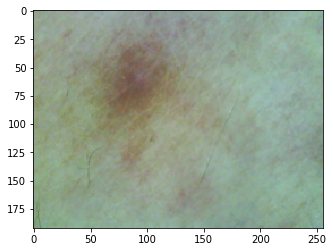

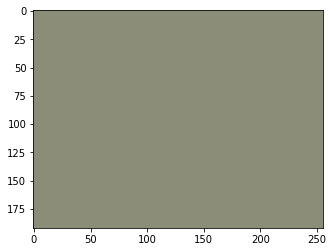

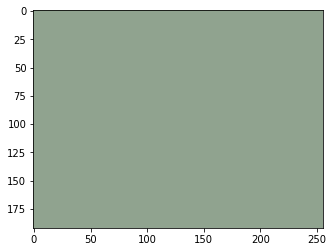

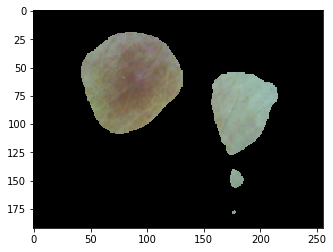

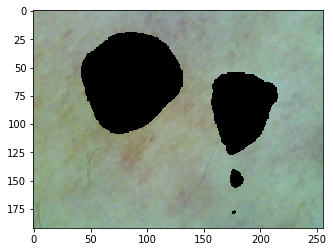

next day..



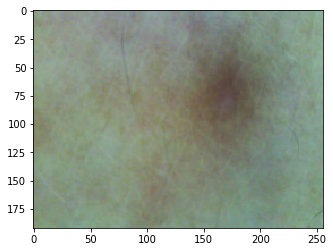

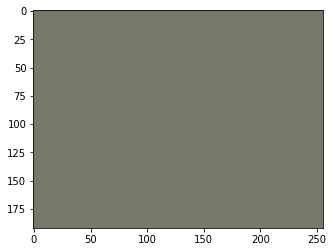

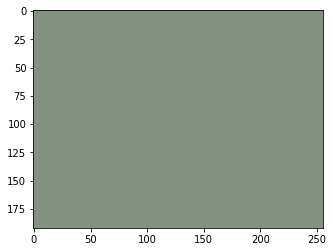

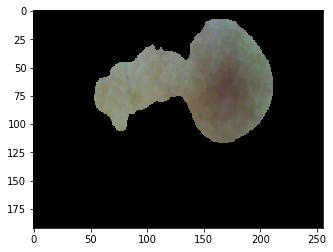

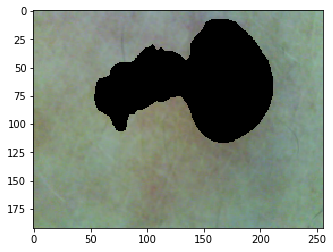

next day..



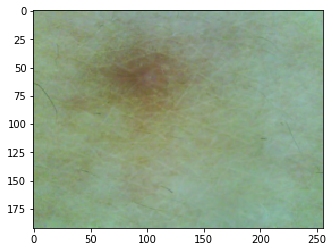

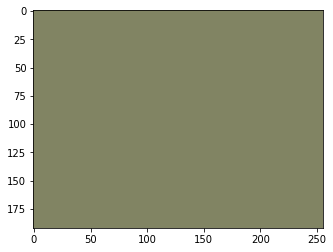

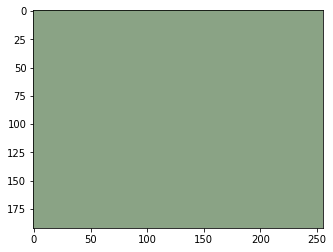

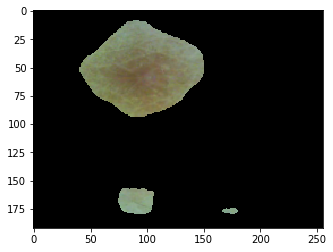

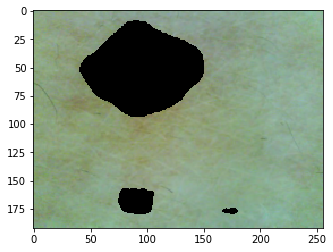

next day..



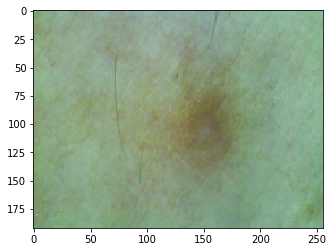

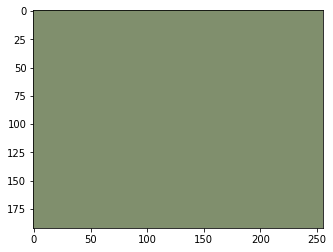

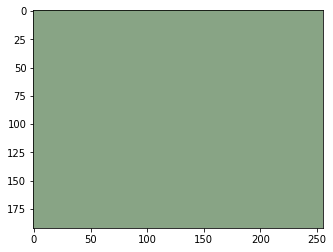

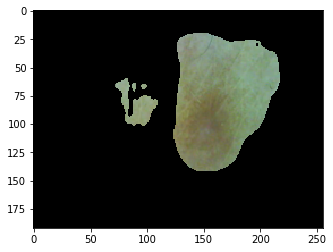

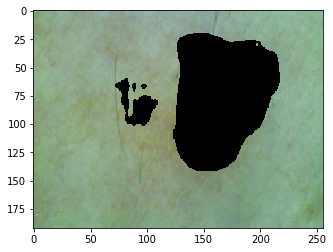

next day..



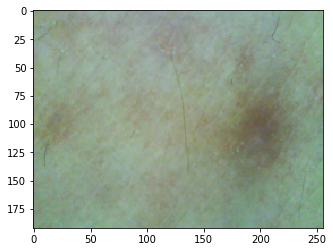

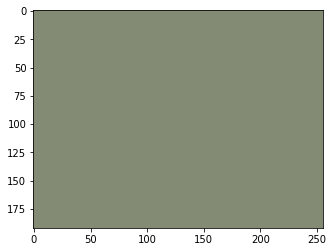

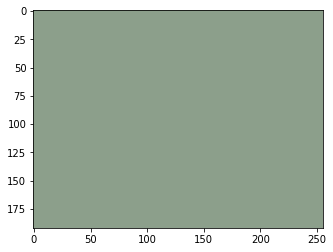

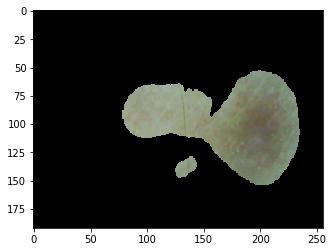

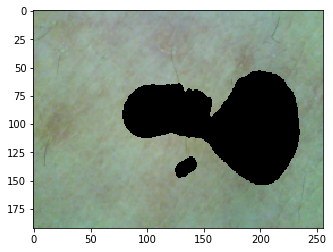

next day..



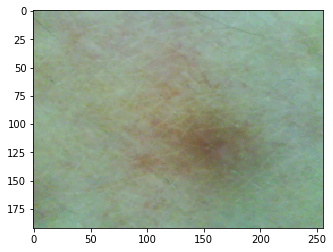

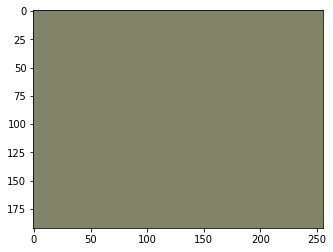

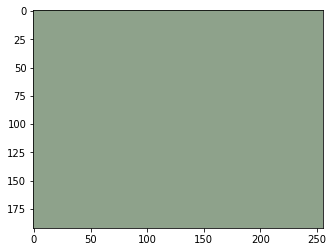

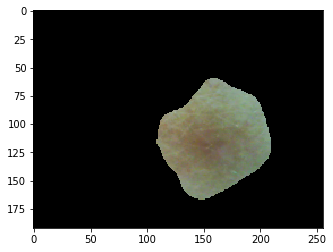

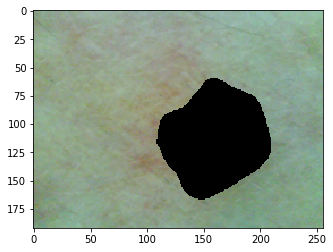

next day..



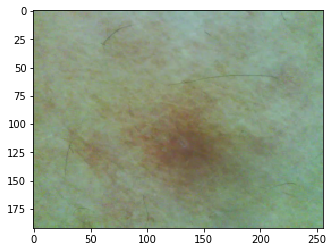

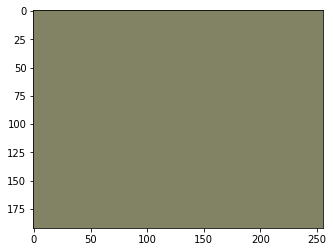

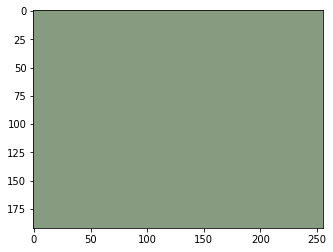

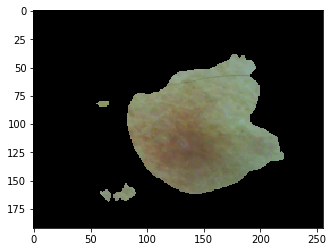

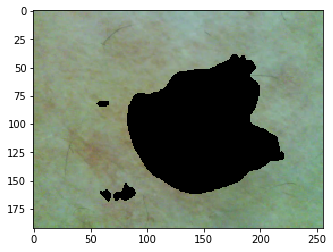

next day..



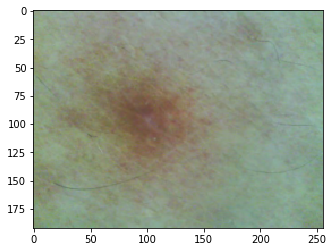

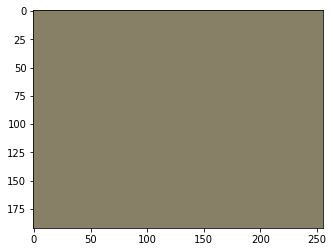

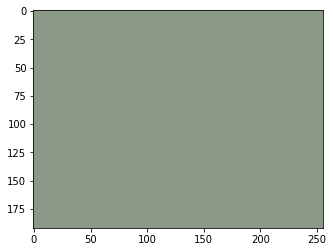

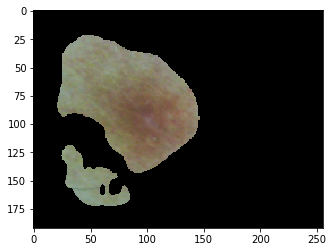

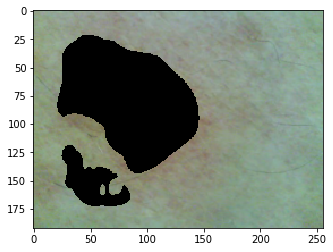

next day..



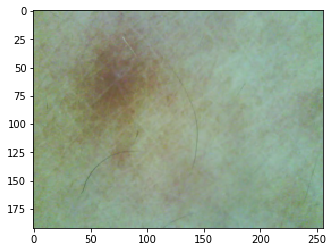

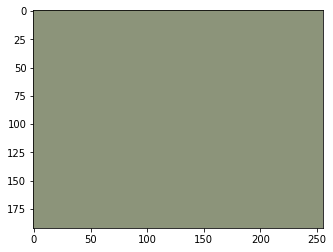

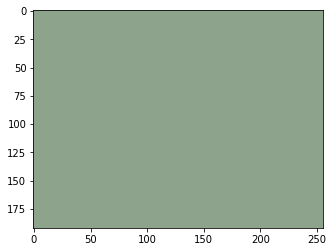

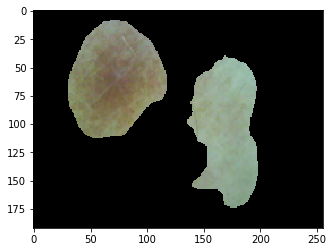

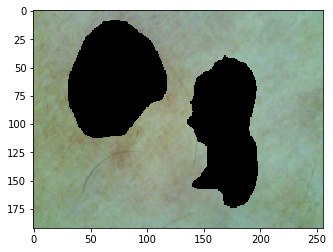

next day..



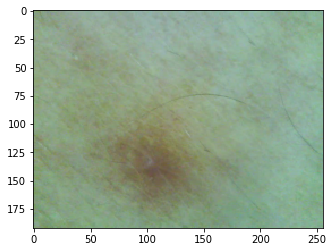

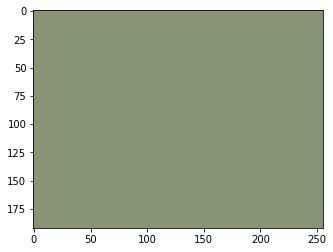

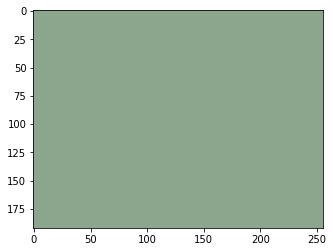

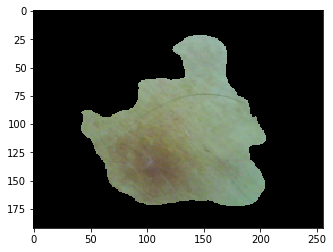

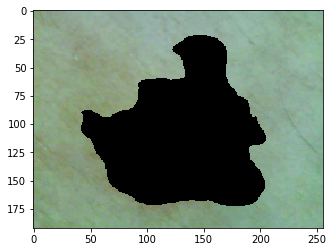

next day..



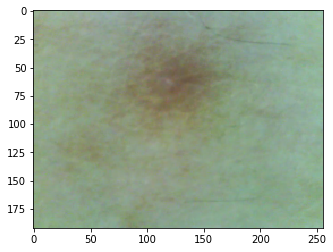

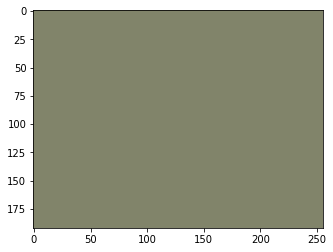

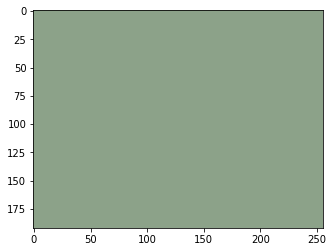

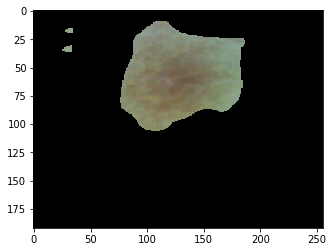

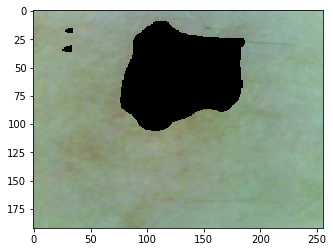

next day..



IndexError: ignored

In [0]:
visual_progress()

In [0]:
def measure_progress(pigs,masks):  ##changed from blue to blue - red
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1) - imagen[:,:,0].reshape(-1) 
        blue_pig = imagep[:,:,2].reshape(-1) - imagep[:,:,0].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,0].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,0].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [0]:
J_out[1].shape

(130, 192, 256)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


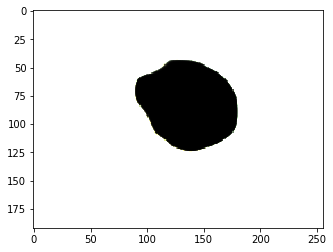

In [0]:
plt.imshow(imagesn[0])

In [0]:
pigmented

array([-22.95999354, -14.22325275, -32.34223153, -12.95483616,
       -28.53470834, -16.31003394, -27.32511887, -16.05975788,
       -13.61506107, -24.6057917 , -16.94475477, -13.79373965,
       -20.38500557, -23.82961242, -27.65856812, -15.9627308 ,
       -15.64645553, -19.29763776])

In [0]:
normal

array([ 3.72975154,  6.48970122, -9.11847407, 10.33662868, -2.10349838,
        0.54696781, -9.96233117, -0.37572801, -2.68978046, -5.09102602,
       -2.24129203, -0.72274871, -2.19860561, -6.12598504, -2.23997268,
       -2.74472569,  2.22976932, -2.70657784])

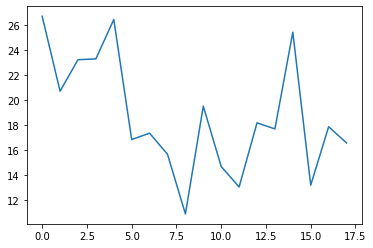

In [0]:
plt.plot(normal - pigmented)

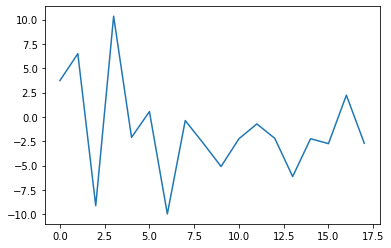

In [0]:
plt.plot(normal)

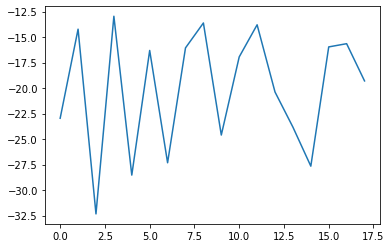

In [0]:
plt.plot(pigmented)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


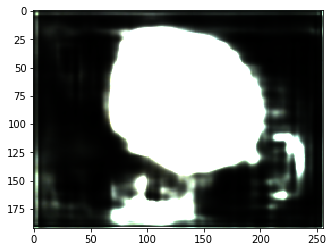

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[1])

In [0]:
plt.imshow(imagesp[2])

In [0]:
plt.imshow(imagesp[3])

In [0]:
plt.imshow(imagesp[4])

In [0]:
plt.imshow(imagesp[5])

In [0]:
plt.imshow(imagesp[6])

In [0]:
plt.imshow(imagesp[7])

In [0]:
plt.imshow(imagesp[8])

In [0]:
plt.imshow(imagesp[9])

In [0]:
plt.imshow(imagesp[10])

In [0]:
pigmented[0]

In [0]:
pigmented[10]

In [0]:
plt.imshow(imagesp[0])

In [0]:
plt.imshow(imagesp[11])

In [0]:
plt.imshow(imagesp[12])

In [0]:
plt.imshow(imagesp[13])

In [0]:
plt.imshow(imagesp[14])

In [0]:
plt.imshow(imagesp[15])

In [0]:
plt.imshow(imagesp[16])

In [0]:
plt.imshow(imagesp[17])

In [0]:
plt.imshow(imagesp[18])

In [0]:
plt.imshow(imagesp[19])

In [0]:
plt.imshow(imagesp[20])

In [0]:
plt.imshow(imagesp[21])

In [0]:
plt.imshow(imagesp[22])

In [0]:
plt.imshow(imagesp[23])

In [0]:
plt.imshow(imagesp[24])

In [0]:
plt.imshow(imagesp[25])

In [0]:
plt.imshow(imagesp[26])

In [0]:
plt.imshow(imagesp[27])

In [0]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

In [0]:
plt.plot(test)

In [0]:
filenames

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [0]:
normal.shape

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

In [0]:
plt.plot(normal-pigmented)

In [0]:
plt.plot(pigmented)

In [0]:
plt.plot(normal)

In [0]:
plt.plot(pigmented/normal)

In [0]:
plt.plot((normal - pigmented)/normal)

In [0]:
new_files_names

In [0]:
plt.imshow(imagesp[12])